In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import plot

In [2]:
data_path = "./global_unemployment_data.csv"
data = pd.read_csv(data_path)

In [3]:
data.head(10)

,country_name,indicator_name,sex,age_group,age_categories,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,Unemployment rate by sex and age,Female,15-24,Youth,13.340,15.974,18.570,21.137,20.649,20.154,21.228,21.640,30.561,32.200,33.332
1,Afghanistan,Unemployment rate by sex and age,Female,25+,Adults,8.576,9.014,9.463,9.920,11.223,12.587,14.079,14.415,23.818,26.192,28.298
2,Afghanistan,Unemployment rate by sex and age,Female,Under 15,Children,10.306,11.552,12.789,14.017,14.706,15.418,16.783,17.134,26.746,29.193,30.956
3,Afghanistan,Unemployment rate by sex and age,Male,15-24,Youth,9.206,11.502,13.772,16.027,15.199,14.361,14.452,15.099,16.655,18.512,19.770
4,Afghanistan,Unemployment rate by sex and age,Male,25+,Adults,6.463,6.879,7.301,7.728,7.833,7.961,8.732,9.199,11.357,12.327,13.087
5,Afghanistan,Unemployment rate by sex and age,Male,Under 15,Children,7.340,8.355,9.362,10.360,10.137,9.930,10.458,10.970,13.170,14.411,15.296
6,Albania,Unemployment rate by sex and age,Female,15-24,Youth,32.590,40.274,34.102,27.429,25.765,26.005,29.766,28.687,27.004,25.758,25.210
7,Albania,Unemployment rate by sex and age,Female,25+,Adults,13.600,14.499,12.142,10.875,10.312,9.662,10.743,10.736,10.073,9.660,9.488
8,Albania,Unemployment rate by sex and age,Female,Under 15,Children,15.476,17.115,14.477,12.511,11.876,11.324,12.536,12.337,11.475,10.938,10.680
9,Albania,Unemployment rate by sex and age,Male,15-24,Youth,43.556,39.644,37.630,34.023,29.906,27.953,31.426,30.366,29.001,27.731,27.267


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134 entries, 0 to 1133
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    1134 non-null   object 
 1   indicator_name  1134 non-null   object 
 2   sex             1134 non-null   object 
 3   age_group       1134 non-null   object 
 4   age_categories  1134 non-null   object 
 5   2014            1134 non-null   float64
 6   2015            1134 non-null   float64
 7   2016            1134 non-null   float64
 8   2017            1134 non-null   float64
 9   2018            1134 non-null   float64
 10  2019            1134 non-null   float64
 11  2020            1134 non-null   float64
 12  2021            1134 non-null   float64
 13  2022            1128 non-null   float64
 14  2023            1122 non-null   float64
 15  2024            1122 non-null   float64
dtypes: float64(11), object(5)
memory usage: 141.9+ KB


In [5]:
data.describe()

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
count,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1128.000000,1122.000000,1122.000000
mean,11.387800,11.272444,11.122963,10.863516,10.516499,10.311452,11.851285,11.422645,10.340361,9.985181,9.940089
std,11.119002,10.915942,10.742947,10.640980,10.527773,10.297952,11.231580,10.873412,10.264810,9.987778,9.977512
min,0.027000,0.034000,0.038000,0.035000,0.044000,0.036000,0.056000,0.064000,0.067000,0.063000,0.060000
25%,3.933500,3.993500,3.945250,3.747500,3.672750,3.538500,4.334500,4.153500,3.555250,3.477500,3.459750
50%,7.697500,7.547500,7.504500,7.140500,6.706000,6.627500,8.067500,7.542500,6.571500,6.466000,6.364000
75%,15.050750,14.766250,14.467500,14.142000,13.343000,13.285500,15.316250,14.881500,13.410000,12.914500,12.687750
max,74.485000,74.655000,74.720000,75.416000,76.395000,77.173000,83.990000,82.135000,78.776000,78.541000,78.644000


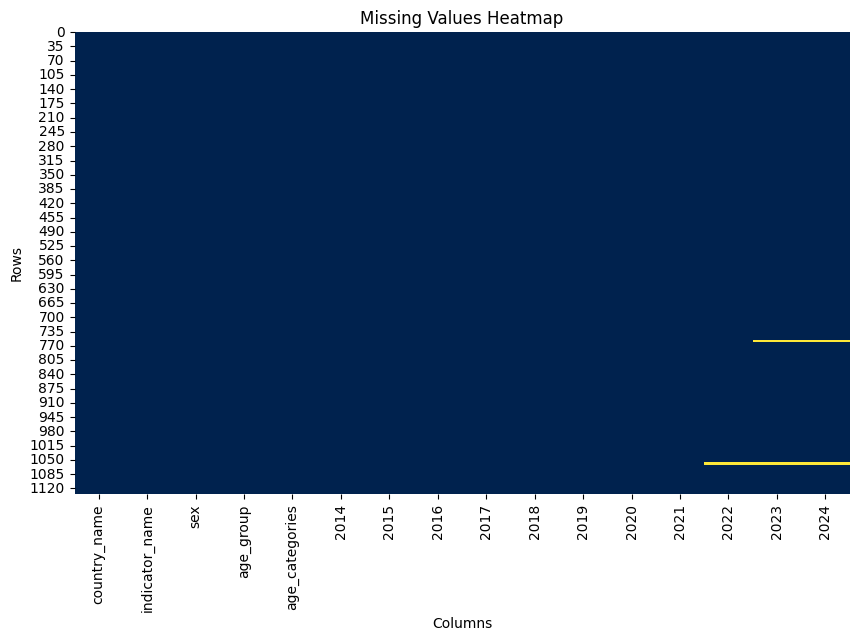

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cmap='cividis', cbar=False)
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [7]:

age_group = data.groupby([ "age_group"]).mean([data.columns[5:]])
new_order = ['Under 15', '15-24', '25+']
reordered_age_group = age_group.reindex(new_order)

In [8]:
reordered_age_group

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
age_group,,,,,,,,,,,
Under 15,8.564595,8.484511,8.355534,8.133942,7.830677,7.680524,8.752675,8.507243,7.663418,7.374644,7.322158
15-24,18.854103,18.629524,18.408087,18.016397,17.517347,17.150283,19.807981,18.884648,17.190085,16.664193,16.625572
25+,6.744701,6.703299,6.605267,6.440209,6.201474,6.103550,6.993198,6.876042,6.167580,5.916706,5.872537


In [9]:
reordered_age_group.values.T

array([[ 8.56459524, 18.85410317,  6.74470106],
       [ 8.48451058, 18.62952381,  6.70329894],
       [ 8.35553439, 18.4080873 ,  6.6052672 ],
       [ 8.1339418 , 18.01639683,  6.44020899],
       [ 7.83067725, 17.51734656,  6.20147354],
       [ 7.68052381, 17.15028307,  6.10355026],
       [ 8.7526746 , 19.80798148,  6.99319841],
       [ 8.50724339, 18.88464815,  6.87604233],
       [ 7.66341755, 17.19008511,  6.16757979],
       [ 7.37464439, 16.66419251,  5.91670588],
       [ 7.32215775, 16.62557219,  5.87253743]])

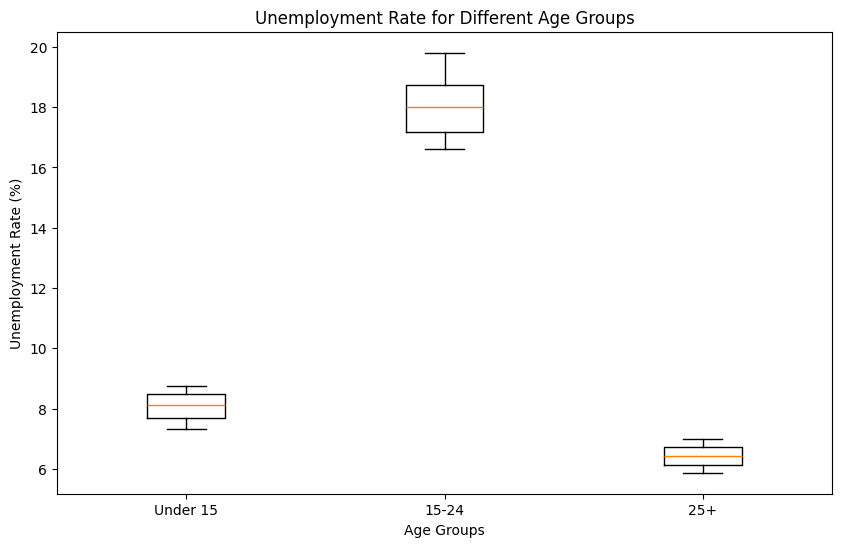

In [10]:
plt.figure(figsize=(10, 6))
plt.boxplot(reordered_age_group.values.T, labels=reordered_age_group.index)
plt.title("Unemployment Rate for Different Age Groups")
plt.xlabel('Age Groups')
plt.ylabel('Unemployment Rate (%)')
plt.show()

c:\Users\amoha\anaconda3\envs\Detect-Sleep-States-CMI\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\amoha\anaconda3\envs\Detect-Sleep-States-CMI\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\amoha\anaconda3\envs\Detect-Sleep-States-CMI\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\amoha\anaconda3\envs\Detect-Sleep-States-CMI\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Average Unemployment Rate for Age Groups Over Time'}, xlabel='Age Group', ylabel='Unemployment Rate'>)

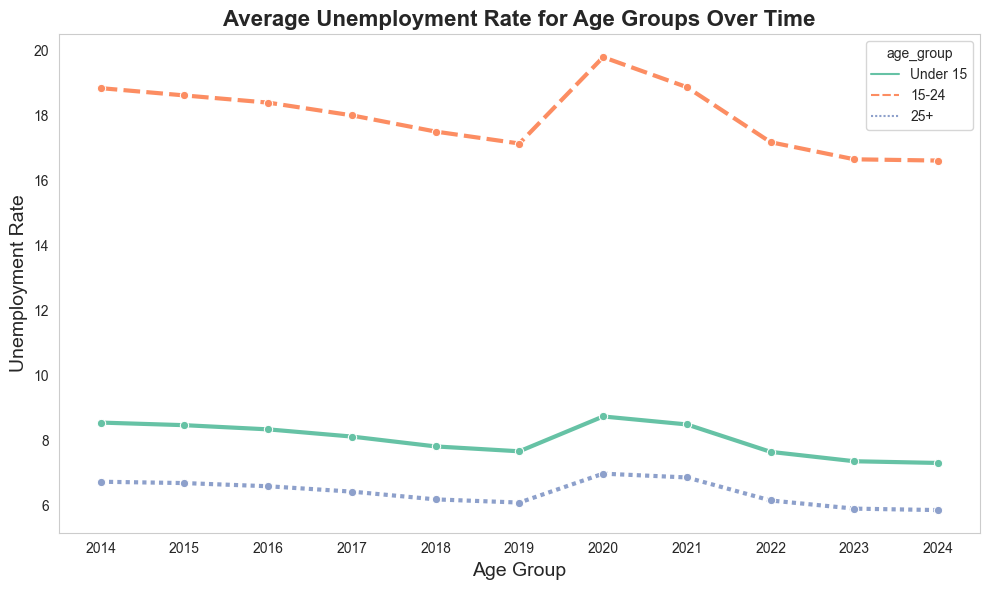

In [11]:
plot(reordered_age_group.T,"Average Unemployment Rate for Age Groups Over Time", "Age Group","Unemployment Rate")

In [12]:
country_group = data.groupby([ "country_name"]).mean([data.columns[5:]])


c:\Users\amoha\anaconda3\envs\Detect-Sleep-States-CMI\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\amoha\anaconda3\envs\Detect-Sleep-States-CMI\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\amoha\anaconda3\envs\Detect-Sleep-States-CMI\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\amoha\anaconda3\envs\Detect-Sleep-States-CMI\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Countries with Lowest Average Unemployment Rate'}, xlabel='Year', ylabel='Unemployment Rate'>)

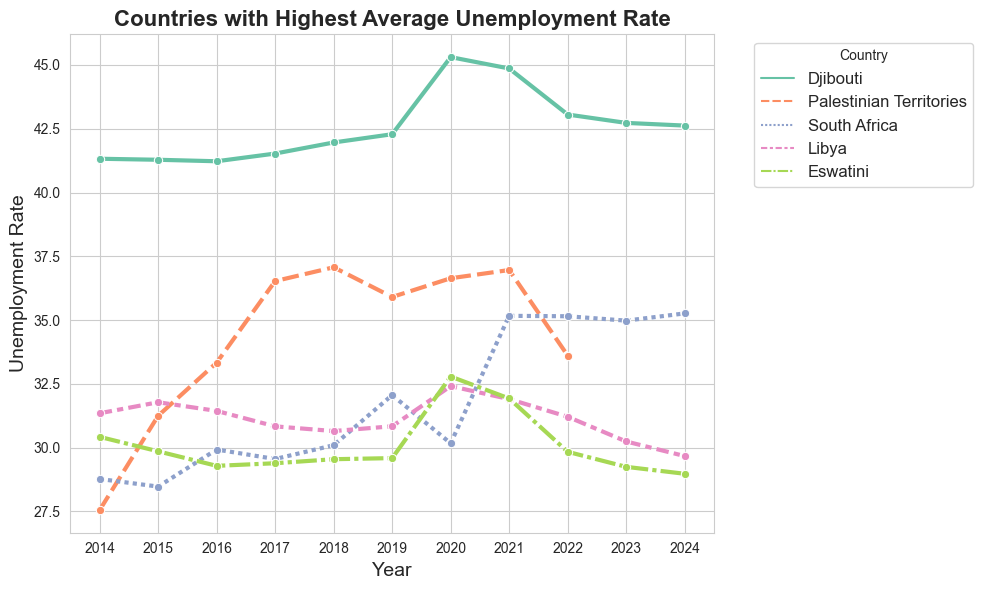

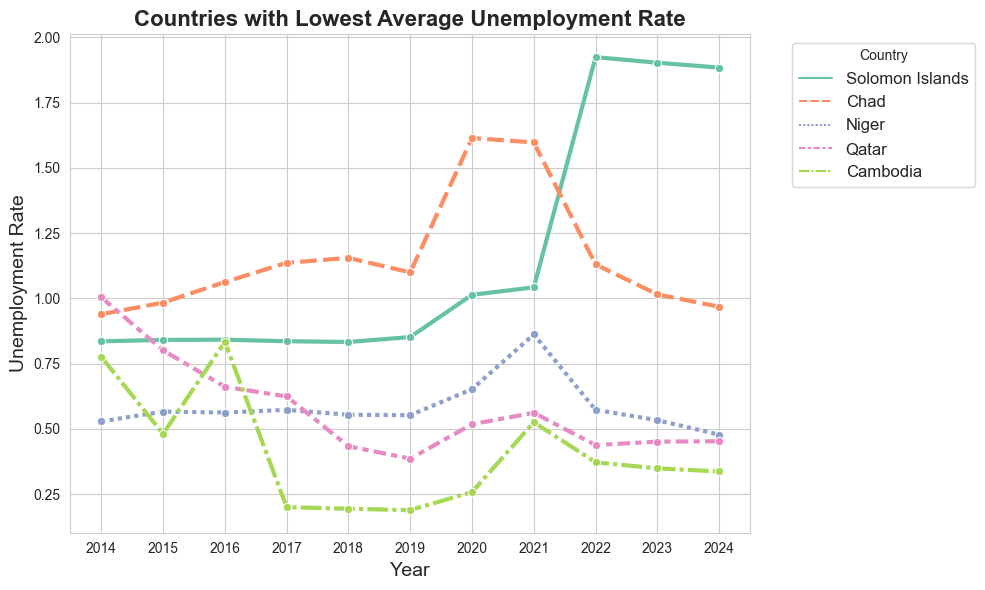

In [13]:

average_unemployment_rate = country_group.mean(axis=1)

sorted_countries = average_unemployment_rate.sort_values(ascending=False)


top_countries_highest = sorted_countries.head(5)  
top_countries_lowest = sorted_countries.tail(5)


df_top_countries_highest = country_group.loc[top_countries_highest.index]
df_top_countries_highest_transposed = df_top_countries_highest.transpose()

df_top_countries_lowest = country_group.loc[top_countries_lowest.index]
df_top_countries_lowest_transposed = df_top_countries_lowest.transpose()

plot(df_top_countries_highest_transposed,"Countries with Highest Average Unemployment Rate","Year","Unemployment Rate","Country",grid=True)
plot(df_top_countries_lowest_transposed,"Countries with Lowest Average Unemployment Rate","Year","Unemployment Rate","Country",grid=True)

c:\Users\amoha\anaconda3\envs\Detect-Sleep-States-CMI\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\amoha\anaconda3\envs\Detect-Sleep-States-CMI\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\amoha\Global_Unemployment\utils.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data, marker='o', ax=ax, palette="Set2", linewidth=3)
c:\Users\amoha\anaconda3\envs\Detect-Sleep-States-CMI\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Average Global Unemployment Rate'}, xlabel='Years', ylabel='Unemployment Rate'>)

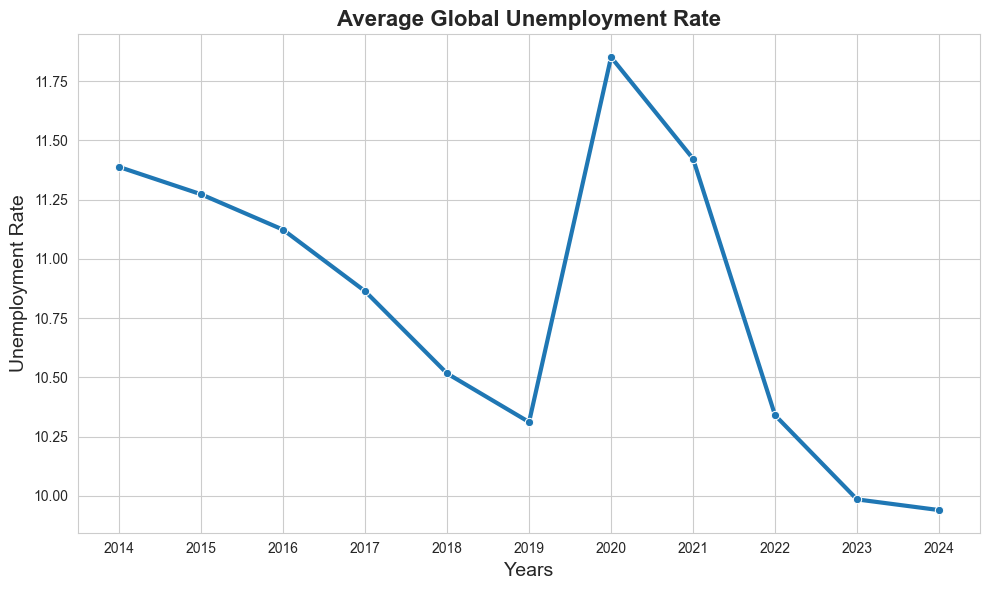

In [14]:
mean_value = country_group.agg("mean")
plot(mean_value, "Average Global Unemployment Rate", "Years", "Unemployment Rate", legend_location="upper right", grid=True)


In [15]:
sex_grouped = data.groupby("sex").mean([data.columns[5:]])

c:\Users\amoha\anaconda3\envs\Detect-Sleep-States-CMI\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\amoha\anaconda3\envs\Detect-Sleep-States-CMI\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\amoha\anaconda3\envs\Detect-Sleep-States-CMI\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\amoha\anaconda3\envs\Detect-Sleep-States-CMI\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Unemployment Rate for Each Gender Over Time'}, xlabel='Year', ylabel='Unemployement rate'>)

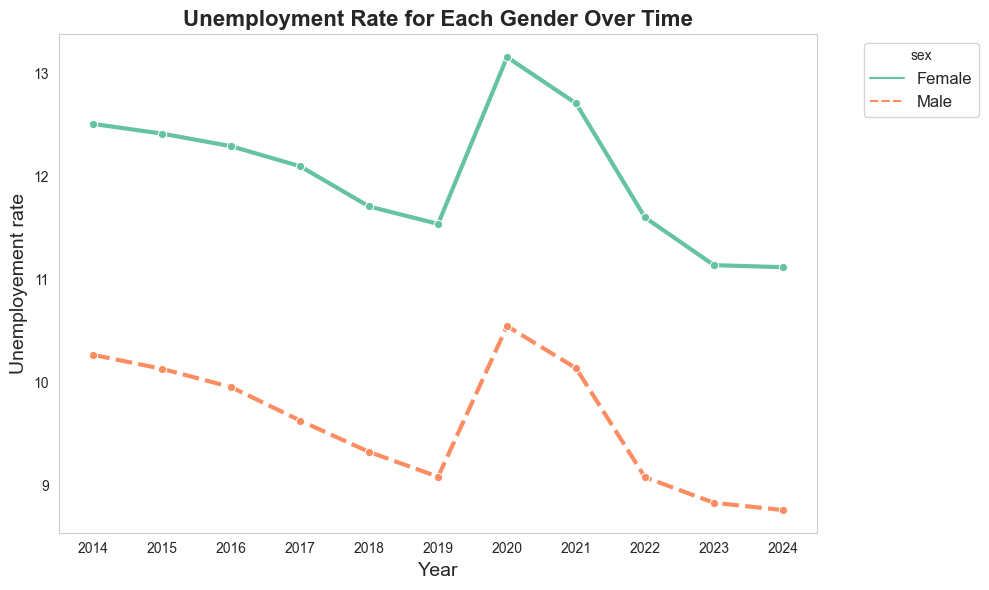

In [16]:
plot(sex_grouped.transpose(),"Unemployment Rate for Each Gender Over Time","Year","Unemployement rate","sex")